# CNN_model_1_keras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.optimizers import Adam

Using TensorFlow backend.


## Load pixel data

In [34]:
for i in range(400):
    img = image.load_img("Data_trial/" + str(i) + ".jpg", target_size = (120, 160))
    img_array = image.img_to_array(img)
    if(i == 0):
        X = np.zeros((400, img_array.shape[0], img_array.shape[1], img_array.shape[2]))
    X[i] = img_array

X = X/255.

yvals = pd.read_excel('Data_trial/data_trial_new_new.xlsx',sheet_name = 'Sheet1',nrows = 400)
y = yvals.values[:,1].reshape(yvals.values[:,1].shape[0],1) # y.shape = (400,1)
Y = np.zeros((y.shape[0], 3))  # three classes, so Y for each example should be 3*1
for i in range(y.shape[0]):
    Y[i, int(y[i,0])] = 1

X_train = X[0:300, :]
Y_train = Y[0:300, :]
X_test = X[300: 350, :]
Y_test = Y[300: 350, :]
X_dev = X[350: 400, :]
Y_dev = Y[350: 400, :]

In [294]:
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_dev shape: " + str(X_test.shape))
print ("Y_dev shape: " + str(Y_test.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

X_train shape: (300, 120, 160, 3)
Y_train shape: (300, 3)
X_dev shape: (50, 120, 160, 3)
Y_dev shape: (50, 3)
X_test shape: (50, 120, 160, 3)
Y_test shape: (50, 3)


[0. 1. 0.]


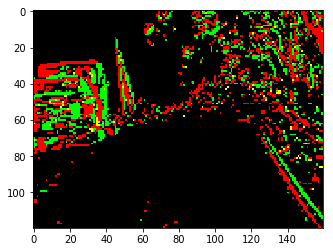

In [12]:
var = 0
plt.imshow(X_dev[var])
print(Y_dev[var])

## Load DVS data

In [27]:
for i in range(400):
    img = image.load_img("Data_DVS/" + str(i) + ".png", target_size = (120, 160))
    img_array = image.img_to_array(img)
    if(i == 0):
        X = np.zeros((400, img_array.shape[0], img_array.shape[1], img_array.shape[2]))
    X[i] = img_array

X = X/255.

yvals = pd.read_excel('Data_trial/data_trial_DVS.xlsx',sheet_name = 'Sheet1',nrows = 400)
y = yvals.values[:,1].reshape(yvals.values[:,1].shape[0],1) # y.shape = (400,1)
Y = np.zeros((y.shape[0], 3))  # three classes, so Y for each example should be 3*1
for i in range(y.shape[0]):
    Y[i, int(y[i,0])] = 1

X_train = X[0:300, :]
Y_train = Y[0:300, :]
X_test = X[300: 350, :]
Y_test = Y[300: 350, :]
X_dev = X[350: 400, :]
Y_dev = Y[350: 400, :]

[0. 1. 0.]


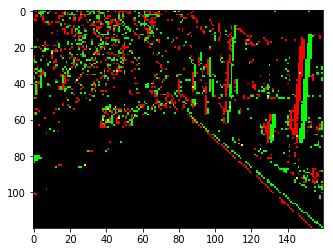

In [14]:
var = 4
plt.imshow(X_dev[var])
print(Y_dev[var])

## Define model

In [4]:
def cnn_model_keras(input_shape, drop_prob):
    """
    Using keras to quickly prototype.
    """
    
    # Define the input placeholder as a tensor with shape input_shape
    X_input = Input(input_shape)
    
    # first layer: 3@60x80 -> 24@60x80
    X = Conv2D(24, (5,5), strides = (2,2), padding='same', name = "conv1")(X_input)
    X = Activation("relu")(X)
    X = Dropout(drop_prob, noise_shape=None, seed=None)(X)
    
    # max pooling: 24@60x80 -> 24@30x40
    X = MaxPooling2D((2,2), strides = (2,2), padding='valid')(X)
    
    # second layer: 24@30x40 -> 36@30x40
    X = Conv2D(36, (5,5), strides = (2,2), padding='same', name = "conv2")(X)
    X = Activation("relu")(X)
    X = Dropout(drop_prob, noise_shape=None, seed=None)(X)
    
    # third layer: 36@30x40 -> 48@30x40
    X = Conv2D(48, (5,5), strides = (1,1), padding='same', name = "conv3")(X)
    X = Activation("relu")(X)
    X = Dropout(drop_prob, noise_shape=None, seed=None)(X)
    
    # flatten: 48@1x4 -> 57600
    X = Flatten()(X)

    # third layer: 57600 -> 64
    X = Dense(64, activation='relu', name='fc1')(X)
    
    # fourth layer: 50 -> 3
    X = Dense(3, activation='softmax', name='fc2')(X)
    
    
    model = Model(inputs = X_input, outputs = X, name = "NN_model_2_keras")
    
    return model

## Traing model

In [22]:
# # create the model
# cnn_model = cnn_model_keras(X_train[0].shape, drop_prob = 0.5)

# # compile the model
# cnn_model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

# train the model
cnn_model.fit(x = X_train, y = Y_train, epochs = 10, batch_size = 300)

Epoch 1/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0248 - acc: 0.9900
Epoch 2/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0272 - acc: 0.9900
Epoch 3/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0150 - acc: 1.0000
Epoch 4/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0211 - acc: 0.9933
Epoch 5/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0370 - acc: 0.9867
Epoch 6/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0087 - acc: 1.0000
Epoch 7/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0232 - acc: 0.9867
Epoch 8/10
300/300 [==============================] - 3s 11ms/step - loss: 0.0101 - acc: 0.9967
Epoch 9/10
300/300 [==============================] - 3s 10ms/step - loss: 0.0142 - acc: 1.0000
Epoch 10/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0111 - acc: 1.0000


## Load model

In [35]:
#cnn_model = load_model('cnn_model_1_pixel')
#cnn_model = load_model('cnn_model_1_DVS')

## Evaluate model

In [36]:
preds = cnn_model.evaluate(x = X_dev, y = Y_dev)
print()
print ("Loss = " + str(preds[0]))
print ("Dev Accuracy = " + str(preds[1]))

preds = cnn_model.evaluate(x = X_test, y = Y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
#cnn_model.summary()

50/50 [==============================] - 0s 7ms/step

Loss = 0.3985013127326965
Dev Accuracy = 0.9000000023841858
50/50 [==============================] - 0s 4ms/step

Loss = 0.4902320492267609
Test Accuracy = 0.8999999904632568


## Error analysis

In [37]:
errors = []
for i in range(50):
    pred = cnn_model.evaluate(x = X_test[i:i+1], y = Y_test[i:i+1])
    if(pred[1] < 1):
        y_pred = cnn_model.predict(X_test[i:i+1])
        max_prob = np.amax(y_pred)
        y_pred[y_pred == max_prob] = 1
        y_pred[y_pred < max_prob] = 0
        errors.append((i, y_pred))

for i in range(len(errors)):
    print("index: " + str(300 + errors[i][0]))
    print("predicted: " + str(errors[i][1]))
    print("correct: " + str(Y_test[errors[i][0]]))

1/1 [==============================] - 0s 11ms/step
index: 300
predicted: [[0. 0. 1.]]
correct: [1. 0. 0.]
index: 316
predicted: [[0. 1. 0.]]
correct: [1. 0. 0.]
index: 318
predicted: [[0. 1. 0.]]
correct: [1. 0. 0.]
index: 331
predicted: [[0. 0. 1.]]
correct: [1. 0. 0.]
index: 347
predicted: [[0. 1. 0.]]
correct: [0. 0. 1.]


In [29]:
cnn_model.save('cnn_model_1_DVS')